# Military Powers of Countries Solutıon

Military Powers of Countries'i clustering(kumeleme) ile cozecegiz.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
df=pd.read_excel('WorldMilitaryPower.xlsx')

In [15]:
df.shape

(139, 60)

In [16]:
df.head()

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
2,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
3,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
4,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369


In [17]:
df.tail()

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
134,Venezuela,0.6449,Venezuela,260,Venezuela,38,Venezuela,0,Venezuela,52,...,Venezuela,"3,16,89,176",Venezuela,"9,12,050",Venezuela,2800,Venezuela,7100,Venezuela,5267
135,Vietnam,0.3559,Vietnam,293,Vietnam,77,Vietnam,0,Vietnam,38,...,Vietnam,"9,70,40,334",Vietnam,"3,31,210",Vietnam,3444,Vietnam,17702,Vietnam,4616
136,Yemen,1.2412,Yemen,169,Yemen,77,Yemen,0,Yemen,8,...,Yemen,"2,86,67,230",Yemen,"5,27,968",Yemen,1906,Yemen,0,Yemen,1601
137,Zambia,1.6464,Zambia,108,Zambia,18,Zambia,0,Zambia,11,...,Zambia,"1,64,45,079",Zambia,"7,52,618",NaN,NaN,Zambia,2250,Zambia,6043
138,Zimbabwe,1.7577,Zimbabwe,90,Zimbabwe,10,Zimbabwe,0,Zimbabwe,14,...,Zimbabwe,"1,40,30,368",Zimbabwe,"3,90,757",NaN,NaN,Zimbabwe,0,Zimbabwe,3229


In [12]:
df.isnull().sum()

2020 ranking          0
Unnamed: 1            0
Airforce Strength     0
Unnamed: 3            0
Unnamed: 4            0
Unnamed: 5            0
Unnamed: 6            0
Unnamed: 7            0
Unnamed: 8            0
Unnamed: 9            0
Unnamed: 10           0
Unnamed: 11           0
Unnamed: 12           0
Unnamed: 13           0
Unnamed: 14           0
Unnamed: 15           0
Land Strength         0
Unnamed: 17           0
Unnamed: 18           0
Unnamed: 19           0
Unnamed: 20           0
Unnamed: 21           0
Unnamed: 22           0
Unnamed: 23           0
Unnamed: 24           0
Unnamed: 25           0
Navy Strength        14
Unnamed: 27          14
Unnamed: 28          23
Unnamed: 29          23
Unnamed: 30          23
Unnamed: 31          23
Unnamed: 32          23
Unnamed: 33          23
Unnamed: 34          23
Unnamed: 35          23
Finances              0
Unnamed: 37           0
Unnamed: 38           0
Unnamed: 39           0
Logistics             0
Unnamed: 41     

In [18]:
# İlk satırı kolon ismi yap
df.columns = df.iloc[0]
df = df[1:]
df.reset_index(drop=True, inplace=True)

In [19]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968


In [20]:
# Kolon isimlerinden ülke sütununu belirle
df.rename(columns={df.columns[0]: "Country"}, inplace=True)

In [21]:
df.head()

,Country,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968


In [22]:
# Veriyi temizle
df_numeric = df.drop(columns=["Country"], errors="ignore").astype(str)
df_numeric = df_numeric.apply(lambda x: x.str.replace(",", "").str.replace("-", "0"))
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')
df_numeric = df_numeric.fillna(0)

In [23]:
df_numeric

,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,1.3444,0.0,260,0.0,0,0.0,25,0.0,30,0.0,...,0.0,34940837,0.0,652230,0.0,0.0,0.0,1200,0.0,5987.0
1,2.3137,0.0,19,0.0,0,0.0,0,0.0,0,0.0,...,0.0,3057220,0.0,28748,0.0,362.0,0.0,41,0.0,691.0
2,0.4659,0.0,551,0.0,103,0.0,22,0.0,59,0.0,...,0.0,41657488,0.0,2381741,0.0,998.0,0.0,0,0.0,6734.0
3,0.8379,0.0,295,0.0,72,0.0,18,0.0,30,0.0,...,0.0,30355880,0.0,1246700,0.0,1600.0,0.0,1300,0.0,5369.0
4,0.6521,0.0,227,0.0,24,0.0,7,0.0,9,0.0,...,0.0,44694198,0.0,2780400,0.0,4989.0,0.0,11000,0.0,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.6449,0.0,260,0.0,38,0.0,0,0.0,52,0.0,...,0.0,31689176,0.0,912050,0.0,2800.0,0.0,7100,0.0,5267.0
134,0.3559,0.0,293,0.0,77,0.0,0,0.0,38,0.0,...,0.0,97040334,0.0,331210,0.0,3444.0,0.0,17702,0.0,4616.0
135,1.2412,0.0,169,0.0,77,0.0,0,0.0,8,0.0,...,0.0,28667230,0.0,527968,0.0,1906.0,0.0,0,0.0,1601.0
136,1.6464,0.0,108,0.0,18,0.0,0,0.0,11,0.0,...,0.0,16445079,0.0,752618,0.0,0.0,0.0,2250,0.0,6043.0


In [26]:
# Olcekleme
scaler = StandardScaler()
scaled = scaler.fit_transform(df_numeric)

In [27]:
# KMEANS Uygula
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled)
df["Cluster"] = clusters

In [28]:
# PCA ile gorsellestirme

In [29]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled)

In [30]:
df["PCA1"] = pca_data[:,0]
df["PCA2"] = pca_data[:,1]

In [31]:
df

,Country,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value,Cluster,PCA1,PCA2
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987,3,-1.040161,0.234896
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,28748,Albania,362,Albania,41,Albania,691,3,-1.734877,0.578608
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,"23,81,741",Algeria,998,Algeria,0,Algeria,6734,0,0.817740,-0.762610
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,"12,46,700",Angola,1600,Angola,1300,Angola,5369,3,-0.517330,0.024806
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,...,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968,3,-0.020707,-0.248941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,0.6449,Venezuela,260,Venezuela,38,Venezuela,0,Venezuela,52,...,"9,12,050",Venezuela,2800,Venezuela,7100,Venezuela,5267,0,-0.011881,-0.535408
134,Vietnam,0.3559,Vietnam,293,Vietnam,77,Vietnam,0,Vietnam,38,...,"3,31,210",Vietnam,3444,Vietnam,17702,Vietnam,4616,0,0.331459,-1.198368
135,Yemen,1.2412,Yemen,169,Yemen,77,Yemen,0,Yemen,8,...,"5,27,968",Yemen,1906,Yemen,0,Yemen,1601,3,-1.179652,0.291156
136,Zambia,1.6464,Zambia,108,Zambia,18,Zambia,0,Zambia,11,...,"7,52,618",NaN,NaN,Zambia,2250,Zambia,6043,3,-1.292038,0.242511


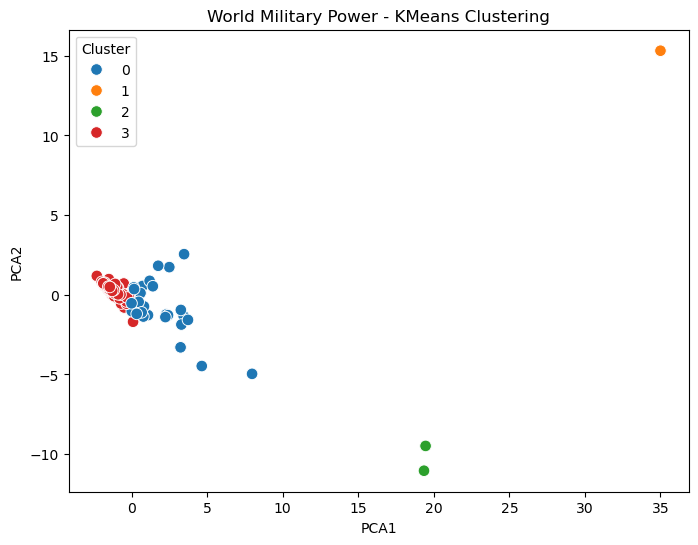

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="tab10", s=70)
plt.title("World Military Power - KMeans Clustering")
plt.legend(title="Cluster")
plt.show()

In [33]:
df.head()
df[["Country", "Cluster"]]

,Country,Cluster
0,Afghanistan,3
1,Albania,3
2,Algeria,0
3,Angola,3
4,Argentina,3
...,...,...
133,Venezuela,0
134,Vietnam,0
135,Yemen,3
136,Zambia,3
